# This notebook is for homework 1 of ICS 635 Fall 2016
## By Edkins, Picot and Ludert 
### (Team PotatoClock) 

In [1]:
%matplotlib inline
import numpy as np
import random as rm
import math
import matplotlib.pyplot as plt



# Here we define the datafaker function

## For now the datafaker will make a 2-d cloud point separated by a line. The line will have slope between -1 and 1 and intercep between -1 and 1 if random is chosen, else it will have the slope and intercep it is told

In [2]:
def data_faker(N, m, b, c=1, rand_div = 'yes'):
    
    if rand_div == 'yes':
        
        slope_sign_choice = rm.random()
        
        if slope_sign_choice < 0.5:
            m_sign = -1
        else:
            m_sign = 1
            
        m = m_sign * rm.random() 
        
        intercep_sign_choice = rm.random()
        
        if intercep_sign_choice < 0.5:
            b_sign = -1
        else:
            b_sign = 1
            
        b = b_sign * rm.random()
        
    points = np.empty([N,3])
    
    for i in range(N):
        
        x_sign_choice = rm.random()
        
        if x_sign_choice < 0.5:
            x_sign = -1
        else:
            x_sign = 1
            
        x_i = x_sign * rm.random() *c
        #---------------------------------------
        
        y_sign_choice = rm.random()
        
        if y_sign_choice < 0.5:
            y_sign = -1
        else:
            y_sign = 1
            
        y_i = y_sign * rm.random() *c
        #----------------------------------------
        
        if y_i < m*x_i+b:
            l_i = 1
        elif y_i > m*x_i+b:
            l_i = -1
            
        points[i,0] = x_i
        points[i,1] = y_i
        points[i,2] = l_i
         
    return points, m, b

def scatter_plot(points, m, b, c = 0, save='no', fig_title = 'scatterplot'):
    
    color = np.empty([len(points)], dtype=str)

    for i in range(len(points)):
        if points[i,2] < 0:
            color[i] = 'r'
        else:
            color[i] = 'b'
    
    if c != 0:
        step = 2*c/100
        x_dummy = np.arange(-c, c, step)
    else:
        step = np.amax(points[:,0]) - np.amin(points[:,0])/100
        x_dummy = np.arange(np.amin(points[:,0]), np.amax(points[:,0])+step, step)
    
    y_dummy = np.empty_like(x_dummy)
    y_dummy[:] = np.multiply(m, x_dummy) + b
    
    plt.figure()

    plt.scatter(points[:,0], points[:,1], c = color)
    plt.plot(x_dummy,y_dummy)
    
    
    if c != 0:
        plt.xlim(-c-(10*c/100), c+(10*c/100))
        plt.ylim(-c-(10*c/100), c+(10*c/100))
    else:
        plt.xlim(np.amin(points[:,0])-(abs(np.amin(points[:,0]))*10/100), np.amax(points[:,0])+(abs(np.amax(points[:,0]))*10/100))
        plt.ylim(np.amin(points[:,1])-(abs(np.amin(points[:,1]))*10/100), np.amax(points[:,1])+(abs(np.amax(points[:,1]))*10/100))
    
    if save == 'yes':
        plt.savefig(fig_title+'.png')
    else:
        plt.show()


In [5]:
def data_faker_2(N, m, b, c=1, gamma=0.0000001, rand_div = 'yes'):
    
    if rand_div == 'yes':
        
        cosine_sign_choice = rm.random()
        
        if cosine_sign_choice < 0.5:
            cosine_sign = -1
        else:
            cosine_sign = 1
            
        cosine = cosine_sign * rm.random()
        
        angle = math.acos(cosine)
        
        m = math.sin(angle)/math.cos(angle)
        
        intercep_sign_choice = rm.random()
        
        if intercep_sign_choice < 0.5:
            b_sign = -1
        else:
            b_sign = 1
            
        b = b_sign * rm.random()
    
    alpha = math.atan(m)
    bd = gamma / math.cos(alpha)
    
    if 0<=abs(alpha)<45:
        gamma_max = (1/math.cos(alpha))*c
    elif 45<=abs(alpha)<90:
        gamma_max = (1/math.sin(alpha))*c
        
    points = np.empty([N,3])
        
    if gamma > gamma_max:
        print('gamma is greater than allowed gamma_max for this slope')
        return points, m, b
    
    for i in range(N):
        
        good = 0
        
        while good == 0:
        
            x_sign_choice = rm.random()

            if x_sign_choice < 0.5:
                x_sign = -1
            else:
                x_sign = 1

            x_i = x_sign * rm.random() *c
            #---------------------------------------

            y_sign_choice = rm.random()

            if y_sign_choice < 0.5:
                y_sign = -1
            else:
                y_sign = 1

            y_i = y_sign * rm.random() *c
            #----------------------------------------
            
            if y_i < m*x_i+b:
                l_i = 1
            elif y_i > m*x_i+b:
                l_i = -1
            
            if l_i == 1 and y_i < m*x_i+(b-bd):
                good = 1
            elif l_i ==-1 and y_i > m*x_i+(b+bd):
                good = 1
                
        points[i,0] = x_i
        points[i,1] = y_i
        points[i,2] = l_i
         
    return points, m, b

# Here we demostrate the use of the datafaker and the plotting

## The datafaker function returns a nX3 array where the first dimenstion id equal to the number of points, and the second dim represents the x, y and lab as well as the slope m and intercep b of the divinding line

### for points, m, b = data_faker(N, m, b, c, rand_div = 'yes') points is [N,3]
### points[i,0] is the x coord
###  points[i,1] is the y coord
###  points[i,2] is the lable

1 0


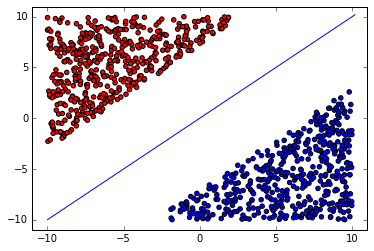

In [11]:
train_set, m, b = data_faker_2(1000, 1, 0, c=10, gamma = 5, rand_div = 'no')
print(m,b)
plot = scatter_plot(train_set, m, b)

In [ ]:
test_set, m, b = data_faker(10, m, b, c=1000, rand_div = 'no')

plot = scatter_plot(test_set, m, b)